## Group Project Final Report (Group 11) 

## Introduction

**Background Information** 

As digital payments boomed in recent years with the rapid development of the Internet, people enjoy the fast and convenient transaction service but also face an increasing number of cyber criminals alongside. 
The Data Breach Index announced that over five million records are being stolen on a daily basis, which indicates that fraud is very common in our daily life. 
However, detection of fraud is challenging since trillions of card transactions happen per day. 

**Research Question**

Using our classification model, can we predict fraudulent transaction using **<font color=red> distance from home and ratio to median purchase price</font>** variables to prevent future crime?

**Dataset description**

We will be using a dataset called Credit Card Fraud by Dhanush Narayanan from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud. The dataset is in a “Comma Seperated Value” (csv) file format and contains eight columns, which are: 
- **distance_from_home** = the distance from home where the transaction happened
- **distance_from_last_transaction** = the distance from last transaction happened.
- **ratio_to_median_purchase_price**  =  Ratio of purchased price transaction to median purchase price.
- **repeat_retailer** = whether the transaction happened from same retailer or not
- **used_chip** = whether the transaction is through chip (credit card) or not
- **used_pin_number** = whether the transaction happened by using PIN number or not
- **online_order** = whether the transaction is an online order or not
- **fraud** = whether the transaction is fraudulent or not

Our target variable, which is the variable that we are predicting, is fraud and the predictors that we will be using are distance_from_home and ratio_to_median_purchase_price.

## Methods & Results

To conduct or analysis, we will load the dataset into R, find the correlation between fraud and other variables, and clean and wrangle the dataset into a tidy format. We will use `fraud` as our target variable and our predictors are `ratio_to_median_purchase_price` and `distance_from_home` as they have the highest correlation to fraud. 
We will then determine the value of K that has the highest estimated accuracy by cross validation and set our model specifications based on it. Then, we will create our recipe and workflow. Lastly, we would use our classifier to predict whether a transaction in the original dataset is fraudulent and evaluate its accuracy. The final step is to visualize our analysis by creating a scatterplot of `ratio_to_median_purchase_price` VS `distance_from_home` where fraudulent and non-fraudulent transactions are separated by different colors and the prediction will be represented through coloured areas.

First of all, we would load the packages that are required to perform the analysis of our dataset.

In [54]:
#Load packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(rvest)



After loading the required packages, we will read our dataset into R using read_csv and assigned it to an object called `original_data`.

In [55]:
#Read the dataset into R
data_link <- "https://raw.githubusercontent.com/chohyeonkim/DSCI-100/main/data/card_transdata.csv"
original_data <- read_csv(data_link)

#Show the first ten rows of the dataset
head(original_data, 10)

Parsed with column specification:
cols(
  distance_from_home = col_double(),
  distance_from_last_transaction = col_double(),
  ratio_to_median_purchase_price = col_double(),
  repeat_retailer = col_double(),
  used_chip = col_double(),
  used_pin_number = col_double(),
  online_order = col_double(),
  fraud = col_double()
)



distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57.8778566,0.3111400,1.94593998,1,1,0,0,0
10.8299427,0.1755915,1.29421881,1,0,0,0,0
5.0910795,0.8051526,0.42771456,1,0,0,1,0
2.2475643,5.6000435,0.36266258,1,1,0,1,0
44.1909360,0.5664863,2.22276730,1,1,0,1,0
5.5864077,13.2610733,0.06476847,1,0,0,0,0
3.7240191,0.9568379,0.27846494,1,0,0,1,0
4.8482466,0.3207354,1.27304952,1,0,1,0,0
0.8766323,2.5036089,1.51699932,0,0,0,0,0


Now, we will use the `cor()` function to find the correlation of each variable in the dataset with our target variable (`fraud`). The closer the correlation value of a variable is to 1, the stronger the correlation of the variable to our target variable and so, we would choose that variable as our predictors.

In [56]:
#Finding the correlation between fraud and other variables
cor(original_data)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.0000000000,0.0001928283,-0.0013741792,0.1431242563,-0.0006970671,-0.0016221862,-0.0013011283,0.18757078
distance_from_last_transaction,0.0001928283,1.0000000000,0.0010125256,-0.0009282325,0.0020548558,-0.0008986436,0.0001408932,0.09191691
ratio_to_median_purchase_price,-0.0013741792,0.0010125256,1.0000000000,0.0013738219,0.0005865787,0.0009422046,-0.0003298145,0.46230472
repeat_retailer,0.1431242563,-0.0009282325,0.0013738219,1.0000000000,-0.0013447766,-0.0004173906,-0.0005322431,-0.00135745
used_chip,-0.0006970671,0.0020548558,0.0005865787,-0.0013447766,1.0000000000,-0.0013931882,-0.0002187927,-0.06097460
used_pin_number,-0.0016221862,-0.0008986436,0.0009422046,-0.0004173906,-0.0013931882,1.0000000000,-0.0002909938,-0.10029254
online_order,-0.0013011283,0.0001408932,-0.0003298145,-0.0005322431,-0.0002187927,-0.0002909938,1.0000000000,0.19197252
fraud,0.1875707828,0.0919169123,0.4623047223,-0.0013574501,-0.0609745976,-0.1002925373,0.1919725224,1.00000000


The next step is to clean our dataset into a tidy format. However, columns `repeat_retailer`, `used_chip`, `used_pin_number`, `online_order`, and `fraud` contain binary values `0` and `1` so we change these values into a logical statement and then as a factor.

In [57]:
card_data <- original_data %>%
        #Converts columns from numerical to logical
            mutate(repeat_retailer = as.logical(repeat_retailer)) %>%
            mutate(used_chip = as.logical(used_chip)) %>%
            mutate(used_pin_number = as.logical(used_pin_number)) %>%
            mutate(online_order = as.logical(online_order)) %>%
            mutate(fraud = as.logical(fraud))%>%
        #Converts data types into factor
            mutate(repeat_retailer = as_factor(repeat_retailer)) %>%
            mutate(used_chip = as_factor(used_chip)) %>%
            mutate(used_pin_number = as_factor(used_pin_number)) %>%
            mutate(fraud = as_factor(fraud)) 



#Show the first ten rows of the dataset
head(card_data, 10)

distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<lgl>,<fct>
57.8778566,0.3111400,1.94593998,TRUE,TRUE,FALSE,FALSE,FALSE
10.8299427,0.1755915,1.29421881,TRUE,FALSE,FALSE,FALSE,FALSE
5.0910795,0.8051526,0.42771456,TRUE,FALSE,FALSE,TRUE,FALSE
2.2475643,5.6000435,0.36266258,TRUE,TRUE,FALSE,TRUE,FALSE
44.1909360,0.5664863,2.22276730,TRUE,TRUE,FALSE,TRUE,FALSE
5.5864077,13.2610733,0.06476847,TRUE,FALSE,FALSE,FALSE,FALSE
3.7240191,0.9568379,0.27846494,TRUE,FALSE,FALSE,TRUE,FALSE
4.8482466,0.3207354,1.27304952,TRUE,FALSE,TRUE,FALSE,FALSE
0.8766323,2.5036089,1.51699932,FALSE,FALSE,FALSE,FALSE,FALSE


We will only be selecting for the columns that will function as our target variable (`fraud`) and predictors (`distance_from_home` and `ratio_to_median_purchase_price`) in our classification model. We will assign our tidy dataset into an object called `card_data`.

In [58]:
#Selecting for the columns that will become the target variable and predictors
card_data <- select(card_data, distance_from_home, ratio_to_median_purchase_price, fraud )

#Show the first ten rows of the dataset
head(card_data, 10)

#Show the first ten rows of the tidy dataset
nrow(card_data)

distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
57.8778566,1.94593998,FALSE
10.8299427,1.29421881,FALSE
5.0910795,0.42771456,FALSE
2.2475643,0.36266258,FALSE
44.1909360,2.22276730,FALSE
5.5864077,0.06476847,FALSE
3.7240191,0.27846494,FALSE
4.8482466,1.27304952,FALSE
0.8766323,1.51699932,FALSE


[1] 1000000

In [59]:
set.seed(1)
percenage_fraud <- card_data %>%
        group_by(fraud) %>%
        summarize(n = n()) %>%
        mutate(percent = 100*n/nrow(card_data))

percenage_fraud


`summarise()` ungrouping output (override with `.groups` argument)



fraud,n,percent
<fct>,<int>,<dbl>
FALSE,912597,91.2597
TRUE,87403,8.7403


Since, the data is unbalanced. We used (`step_upsample`) to balance it.

In [60]:
#Setting the seed
set.seed(1)

#Splitting the dataset stored in card_data into training dataset and testing dataset
ups_recipe <- recipe(fraud ~ ., data = card_data)%>%
step_upsample(fraud , over_ratio = 1, skip = FALSE) %>%
  prep()

upsampled_fraud <- bake(ups_recipe, card_data)

# balanced data
total_case <- upsampled_fraud %>%
  group_by(fraud)%>%
  summarize(n = n())
upsampled_fraud

total_case


`summarise()` ungrouping output (override with `.groups` argument)



distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
57.8778566,1.94593998,FALSE
10.8299427,1.29421881,FALSE
5.0910795,0.42771456,FALSE
2.2475643,0.36266258,FALSE
44.1909360,2.22276730,FALSE
5.5864077,0.06476847,FALSE
3.7240191,0.27846494,FALSE
4.8482466,1.27304952,FALSE
0.8766323,1.51699932,FALSE


fraud,n
<fct>,<int>
FALSE,912597
TRUE,912597


Because the orginal data set is too large to handle. We have decided to take 10% of the data which is (`sample_card_data`).

Next, we will be splitting our dataset (`sample_card_data`) where 60% of the dataset will be our training dataset (`card_train_2`) and the other 40% will be our testing dataset (`card_test_2`). 

In [61]:
set.seed(1)
# Sample data (2000 ramdom data set)
sample_card_data <- rep_sample_n(upsampled_fraud, 50000)

count(sample_card_data)

# Spliting data
card_split <- initial_split(sample_card_data, prop = 0.7, strata = fraud)  
card_train <- training(card_split) 
card_test <- testing(card_split)

#Show the first ten rows of the training dataset
head(card_train, 10)

# traning data set (balanced)
 card_train %>%
  group_by(fraud)%>%
  summarize(n = n())



replicate,n
<int>,<int>
1,50000


replicate,distance_from_home,ratio_to_median_purchase_price,fraud
<int>,<dbl>,<dbl>,<fct>
1,31.8137974,5.1225528,TRUE
1,0.5929219,1.6732185,FALSE
1,12.5740794,1.4387046,FALSE
1,1.5276101,4.8696856,TRUE
1,17.7359157,0.6084818,FALSE
1,0.7523377,4.6300780,TRUE
1,9.2765565,1.5438336,FALSE
1,28.9499476,8.3008536,TRUE
1,0.2730164,1.5979985,FALSE


`summarise()` ungrouping output (override with `.groups` argument)



fraud,n
<fct>,<int>
FALSE,17482
TRUE,17519


Lastly, we will create a scatter plot to visualize the relationship between our target variable and predictors.

Warning message:
“Removed 3 rows containing missing values (geom_point).”


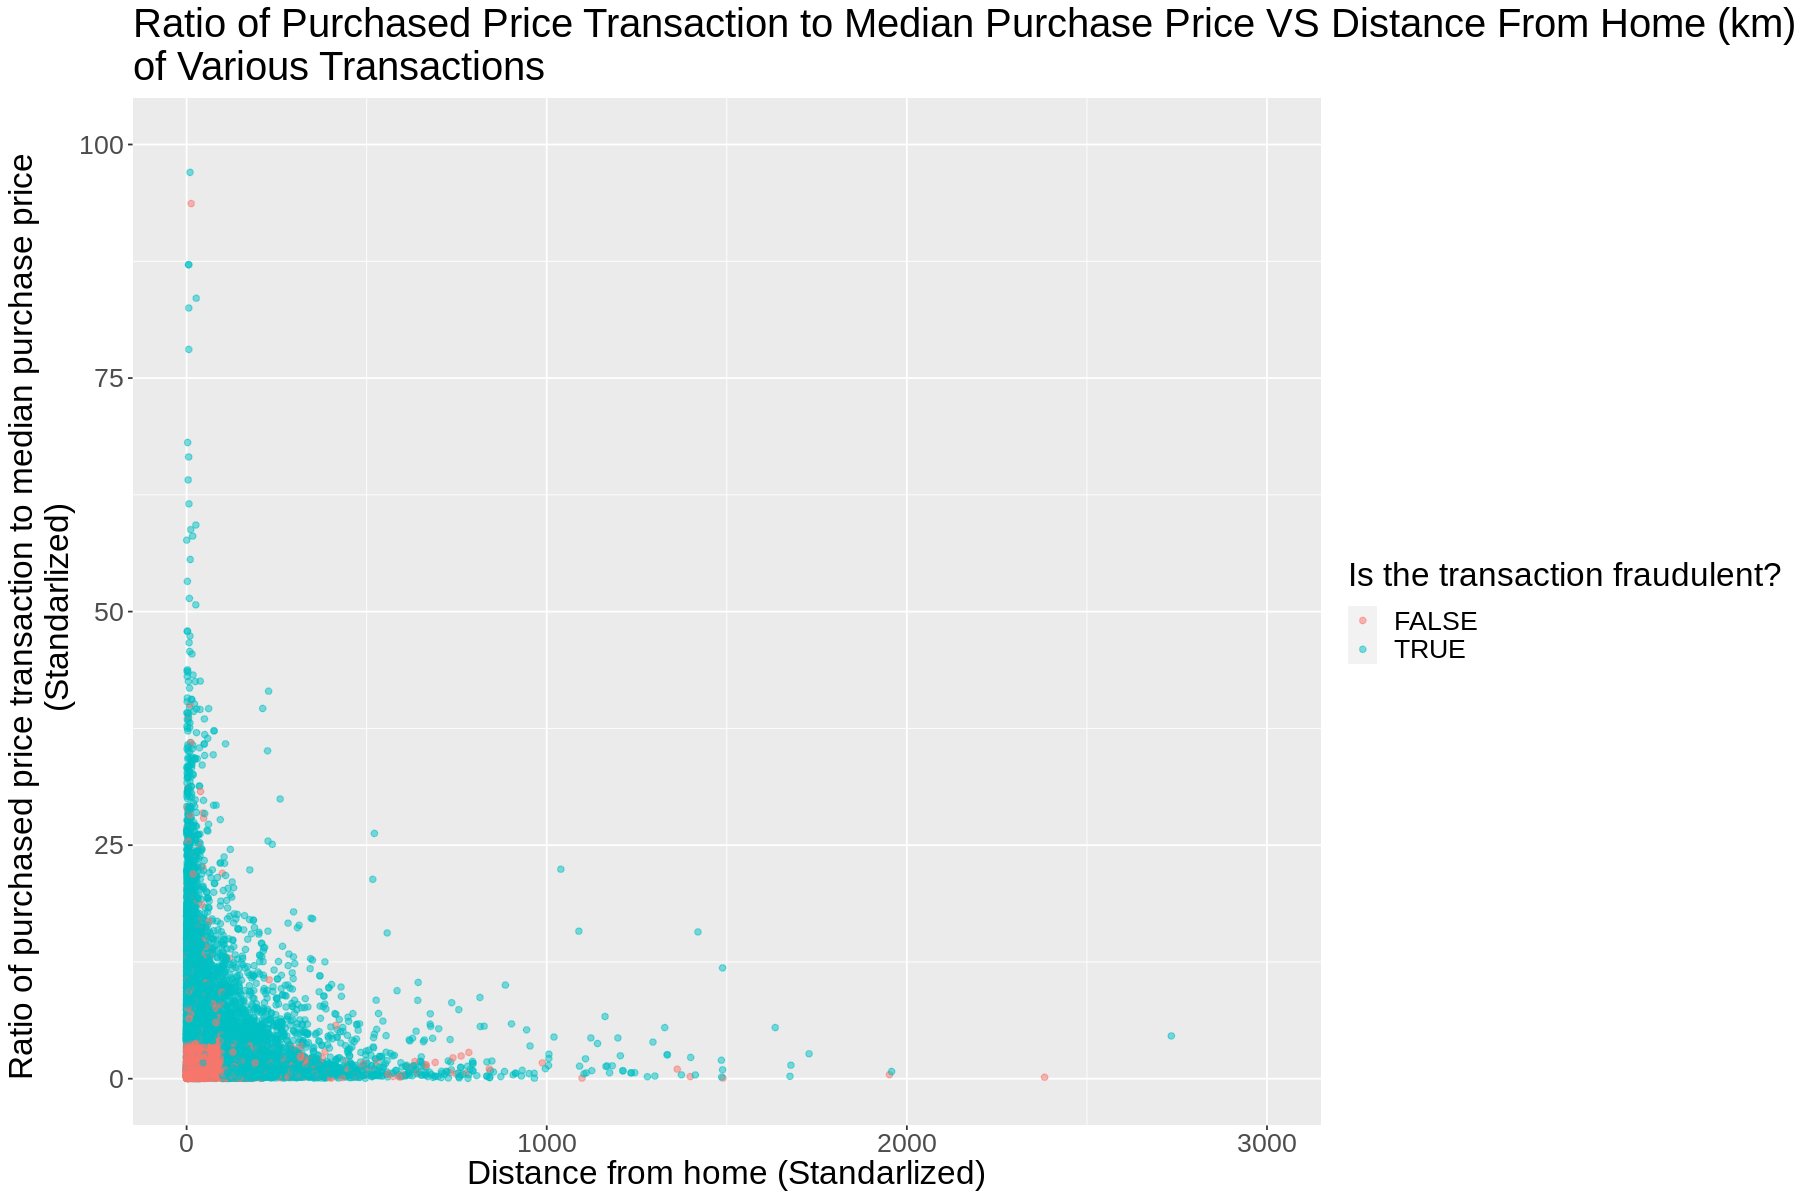

In [62]:
#Setting the size of the plot
options(repr.plot.width = 15, repr.plot.height = 10) 

#Visualizing the relationship by setting up limits to scale the plot
card_plot <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud)) +
             geom_point(alpha = 0.5) +
             scale_y_continuous(limits = c(0, 100)) +
             scale_x_continuous(limits = c(0, 3000)) +
             labs(x = "Distance from home (Standarlized)", 
                  y = "Ratio of purchased price transaction to median purchase price \n (Standarlized)", 
                  color = "Is the transaction fraudulent?" ) +
             ggtitle("Ratio of Purchased Price Transaction to Median Purchase Price VS Distance From Home (km) \nof Various Transactions") +
             theme(text = element_text(size = 20))
card_plot

Warning message:
“Removed 1659 rows containing missing values (geom_point).”


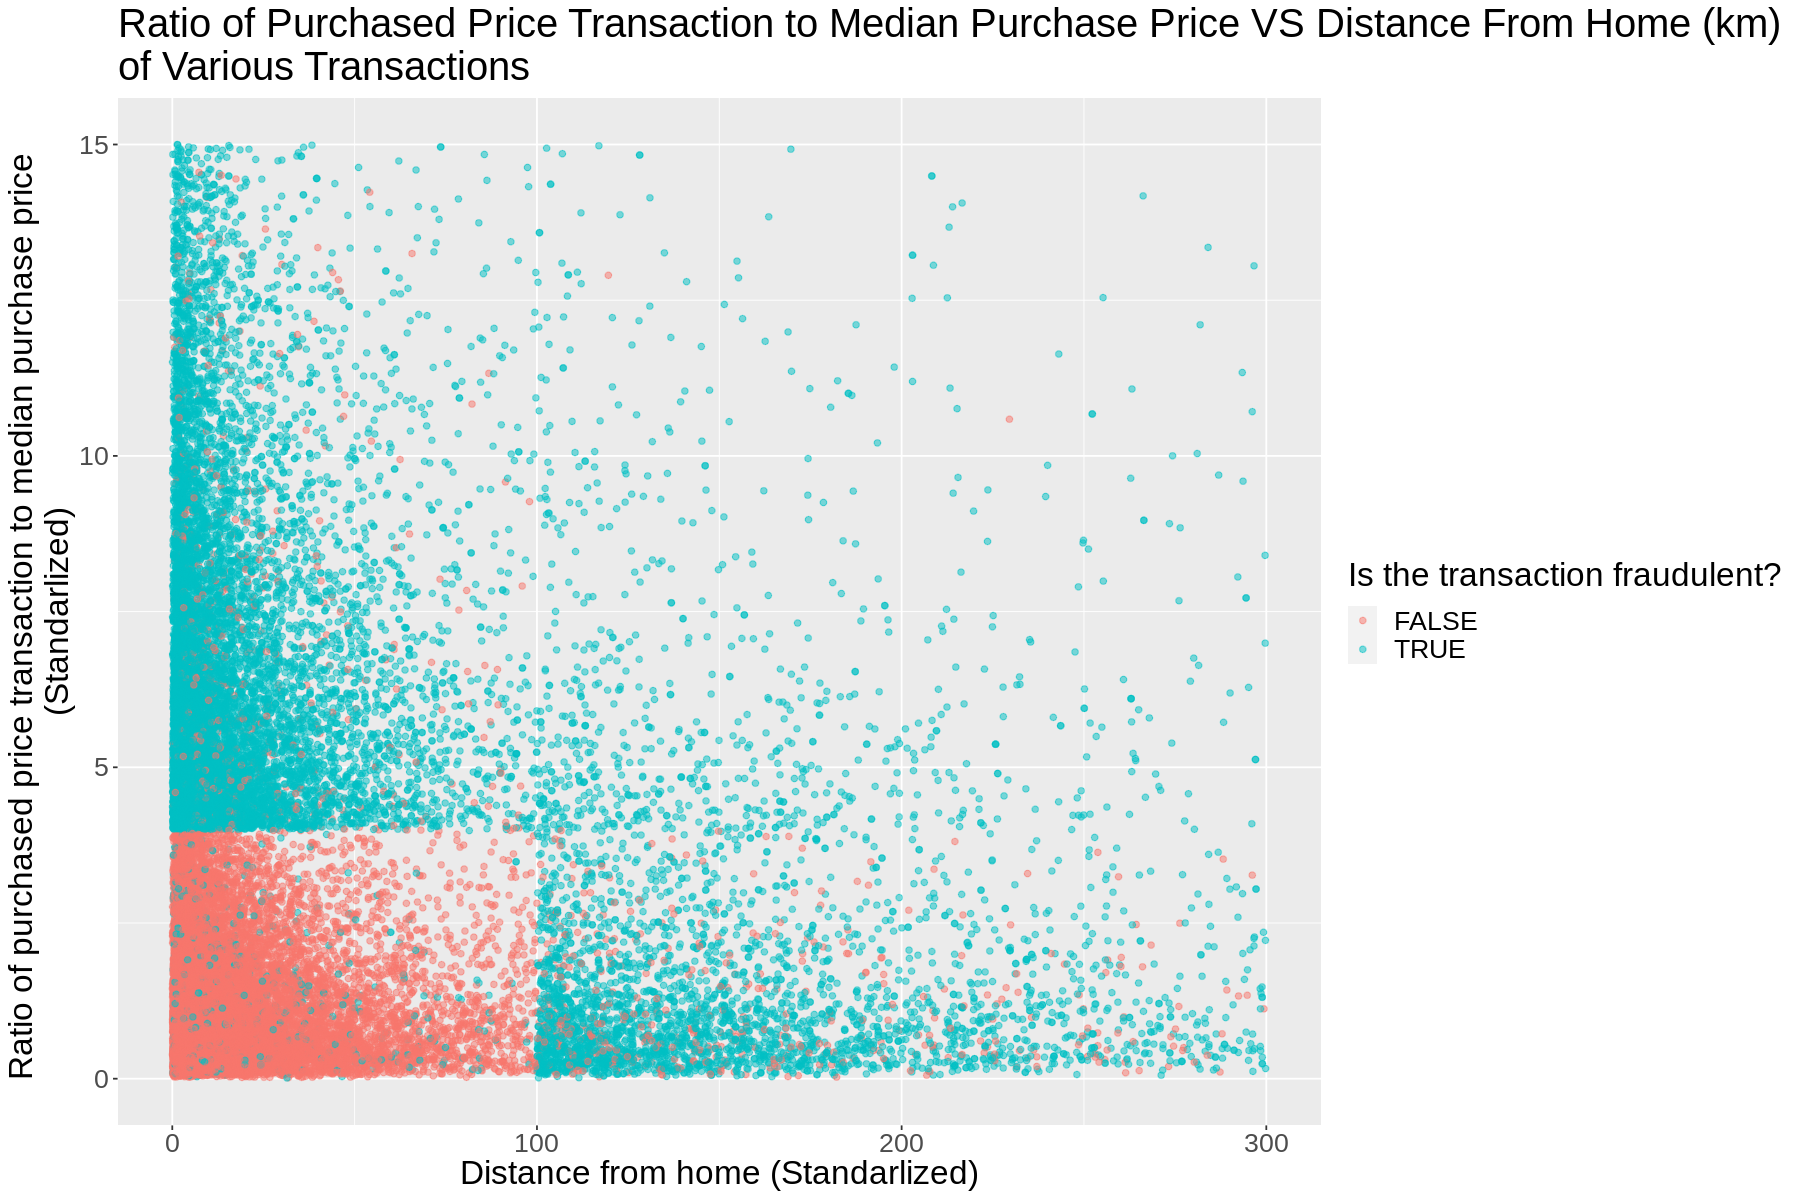

In [63]:
#zoom in the plot
options(repr.plot.width = 15, repr.plot.height = 10) 

#Visualizing the relationship by setting up limits to scale the plot
zoom_card_plot <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud)) +
             geom_point(alpha = 0.5) +
             scale_y_continuous(limits = c(0, 15)) +
             scale_x_continuous(limits = c(0, 300)) +
             labs(x = "Distance from home (Standarlized)", 
                  y = "Ratio of purchased price transaction to median purchase price \n(Standarlized)", 
                  color = "Is the transaction fraudulent?" ) +
             ggtitle("Ratio of Purchased Price Transaction to Median Purchase Price VS Distance From Home (km) \nof Various Transactions") +
             theme(text = element_text(size = 20))
zoom_card_plot

Next we will perform crossvalidation for the k value.

Since our sample data is fairly large, cross validation and fitting the model will take up to 10 minutes to complete

In [64]:
#create recipe
card_recipe <- recipe(fraud ~ distance_from_home + ratio_to_median_purchase_price, data = card_train)%>%
  step_scale(all_predictors())%>%
  step_center(all_predictors())

card_recipe

k_vals <- tibble(neighbors = seq(from = 1, to = 101 , by = 10)) 

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [65]:
#create 3 fold cross validation
set.seed(1)
card_vfold <- vfold_cv(card_train, v = 3, strata = fraud)

knn_results <- workflow() %>%
      add_recipe(card_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = card_vfold, grid = k_vals) %>%
      collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8879174,3,0.001359008,Model01
1,roc_auc,binary,0.8879129,3,0.001359555,Model01
11,accuracy,binary,0.9334019,3,0.002101145,Model02
11,roc_auc,binary,0.9417068,3,0.001305248,Model02
21,accuracy,binary,0.9332591,3,0.001982108,Model03
21,roc_auc,binary,0.9415698,3,0.001517402,Model03
31,accuracy,binary,0.9325448,3,0.002141040,Model04
31,roc_auc,binary,0.9416554,3,0.001788165,Model04
41,accuracy,binary,0.9320591,3,0.002182392,Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.9334019,3,0.002101145,Model02


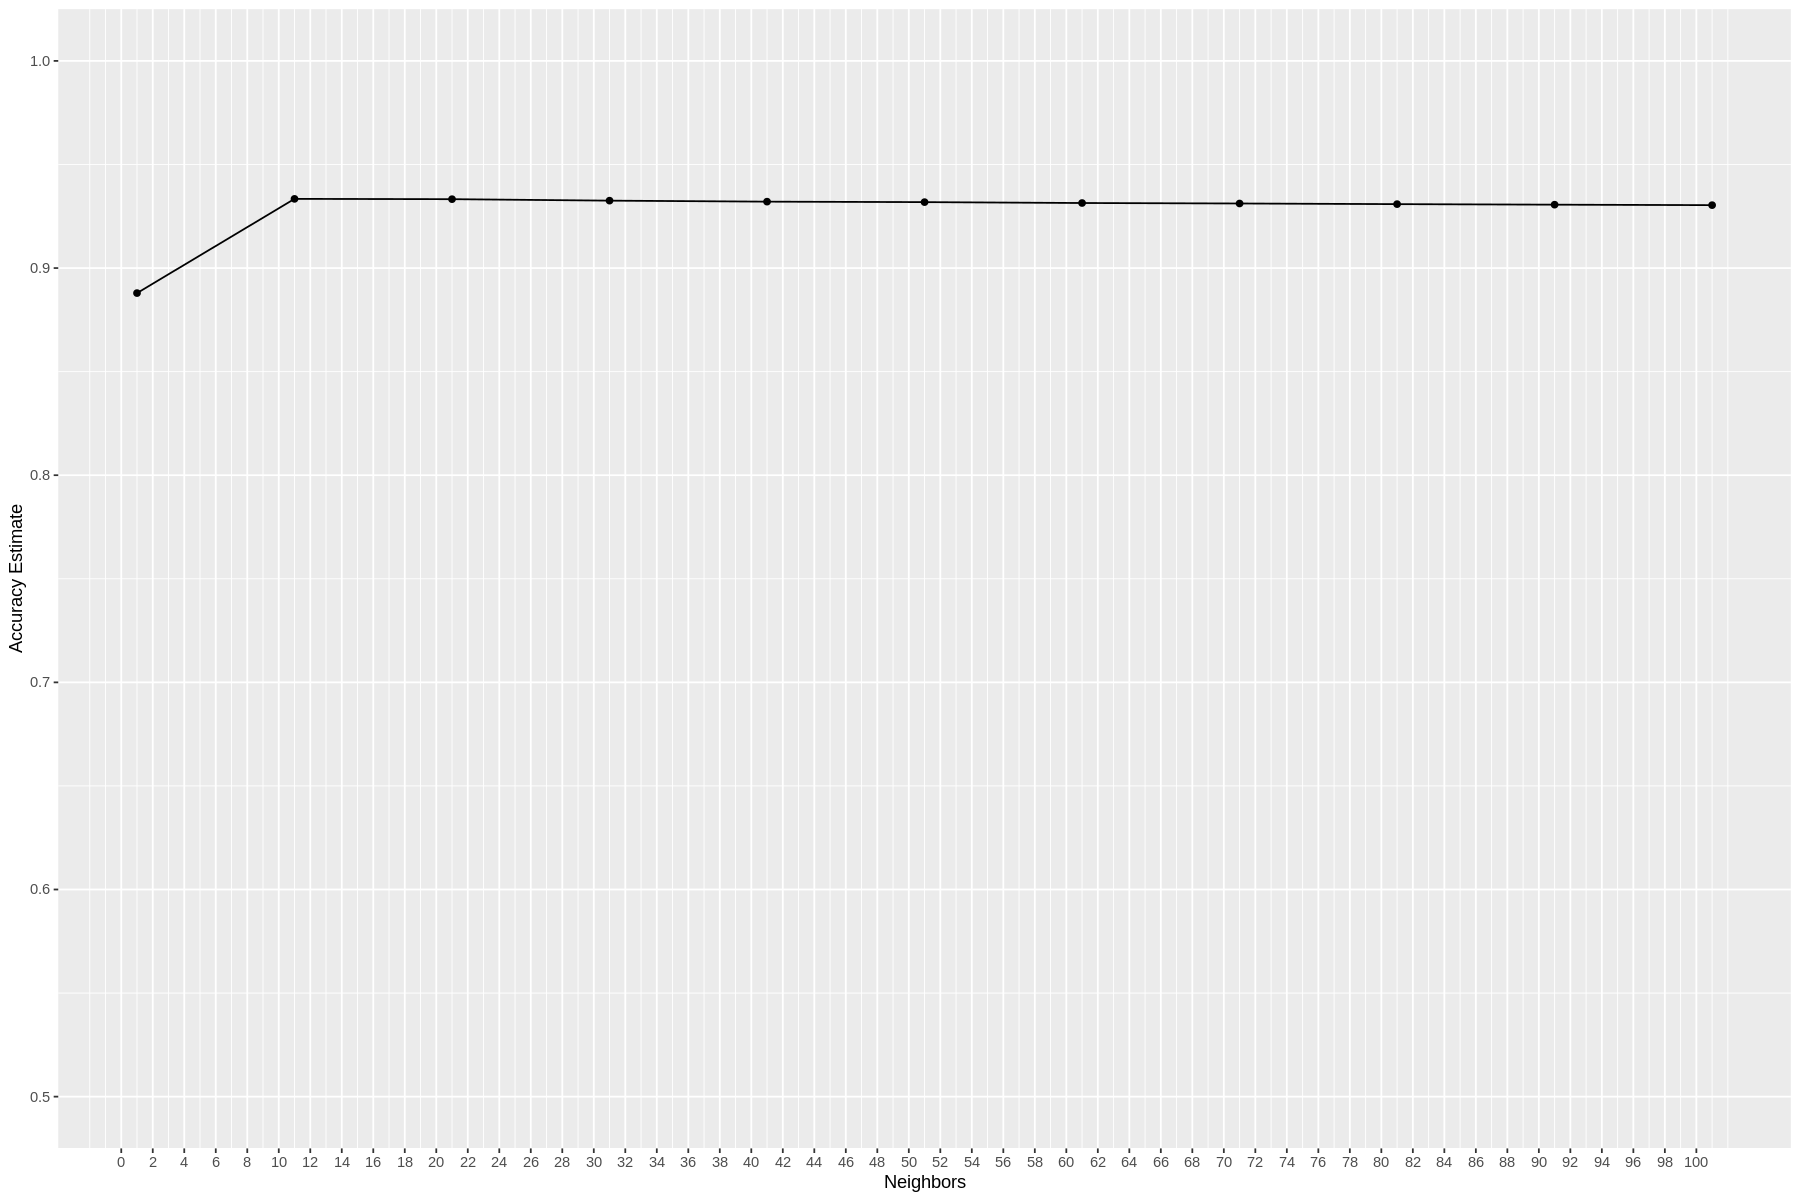

In [66]:
set.seed(1)
accuracies <- knn_results %>% 
      filter(.metric == "accuracy")
accuracies%>%
slice_max(order_by = mean)

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 100, by = 2)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.5, 1.0)) # adjusting the y-axis


# your code here

accuracy_versus_k

In [67]:
set.seed(1)
mean_accuracies <- accuracies %>%
                arrange(mean) %>%
                tail(1)

mean_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.9334019,3,0.002101145,Model02


In [68]:
set.seed(1)
card_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
            set_engine("kknn") %>%
            set_mode("classification")

card_fit <- workflow()%>%
            add_recipe(card_recipe)%>%
            add_model(card_spec) %>%
            fit(data = card_train)

card_prediction <- predict(card_fit, card_test) %>%
                bind_cols(card_test)

card_metrics <- card_prediction %>%
                metrics(truth = fraud , estimate = .pred_class)

card_metrics

card_conf_mat <- card_prediction %>%
            conf_mat(truth = fraud , estimate = .pred_class) 

card_conf_mat


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9336622
kap,binary,0.8673213


          Truth
Prediction FALSE TRUE
     FALSE  6909  412
     TRUE    583 7095

Predicting fraud as true

In [69]:
set.seed(1)
new_obs_all <- tibble(distance_from_home = 200, ratio_to_median_purchase_price = 50)

card_workflow  <- workflow() %>%
                  add_recipe(card_recipe) %>%
                  add_model(card_spec)
card_workflow  

# your code here
knn_fit_all <- card_workflow%>%
            fit(data = card_train)

class_prediction_all <- predict(knn_fit_all, new_obs_all)
class_prediction_all

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 11
  weight_func = rectangular

Computational engine: kknn 


.pred_class
<fct>
TRUE


Predicting a fraud as false from new data

In [70]:
set.seed(1)
new_obs_fraud <- tibble(distance_from_home = 40, ratio_to_median_purchase_price = 2)

card_workflow  <- workflow() %>%
                  add_recipe(card_recipe) %>%
                  add_model(card_spec)
card_workflow  

# your code here
knn_fit_all <- card_workflow%>%
            fit(data = card_train)

class_prediction_all <- predict(knn_fit_all, new_obs_fraud)
class_prediction_all

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 11
  weight_func = rectangular

Computational engine: kknn 


.pred_class
<fct>
FALSE


 ## Discussion
 
- **Summarize what you found**

We found that 

- **Discuss whether this is what you expected to find?**

We expected to find that

- **Discuss what impact could such findings have?**

It could dictate and influence consumer decisions when purchasing items from vendors both online and offline and help algorithm and moderators of online and offline shopping platforms to identify potential fraudulent vendors.

- **Discuss what future questions could this lead to?**

This could lead to the rationale behind why it is more likely that a vendor to be fraudulent on higher price items when further away from the customers' home. Whether it is because more customers are more likely to purchase from fraudulent vendor that sell expensive merchandise or because vendors are less likely to be caught when they are further away from their victim's place of residence that causes the phenomenon we observe.



## References
Citations of literature

    1. Timbers, T., Campbell, T., & Lee, M. (2022). Data science: A first introduction. CRC Press.

    2. Team, R. C. (2013). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. http://www. R-project. org/.

Citation of dataset

    1. The Dataset is sourced by some unnamed institute and can be found on Kaggle website by using the URL https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud